<h1>--- Partie 1:---</h1>

Dans cette partie, nous allons développer et appliquer deux algorithmes de clustering non supervisé : k-means (avec 𝑘=2) et DBSCAN. L’objectif est de les tester sur l’exemple du cours relatif à la décision de "jouer au tennis" tout en faisant abstraction des étiquettes réelles (c’est-à-dire sans utiliser la variable cible lors de l’entraînement). Après avoir exécuté les deux méthodes de regroupement, nous confronterons les résultats obtenus avec les étiquettes réelles afin d’évaluer la qualité du partitionnement proposé par chaque algorithme. 

<h2>1. Préparation des données</h2>

On extrait les colonnes : Ciel, Température, Humidité, Vent pour l'entraînement (sans la colonne "Jouer au Tennis").

In [58]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [59]:
# Données d'entrée sans les étiquettes
X = np.array([
    [1, 1, 1, -1],
    [1, 1, 1, 1],
    [0, 1, 1, 1],
    [1, -1, 1, -1],
    [-1, 1, 1, -1],
    [-1, 1, -1, -1],
    [-1, -1, -1, -1],
    [0, 0, 1, -1],
    [1, 0, 1, -1],
    [-1, 0, 1, 1],
    [1, 0, -1, 1],
    [0, 0, -1, 1],
    [0, 1, 1, -1],
    [-1, 0, 1, -1]
])

In [60]:
# Étiquettes réelles (1 = Oui, 0 = Non)
y_true = np.array([
    0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0
])

<h2>2. Application de K-Means (k=2)</h2>

In [61]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

<h2>3. Application de DBSCAN</h2>

In [62]:
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

<h2>4. Visualisation avec PCA</h2>

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [64]:
# Réduction de dimension
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

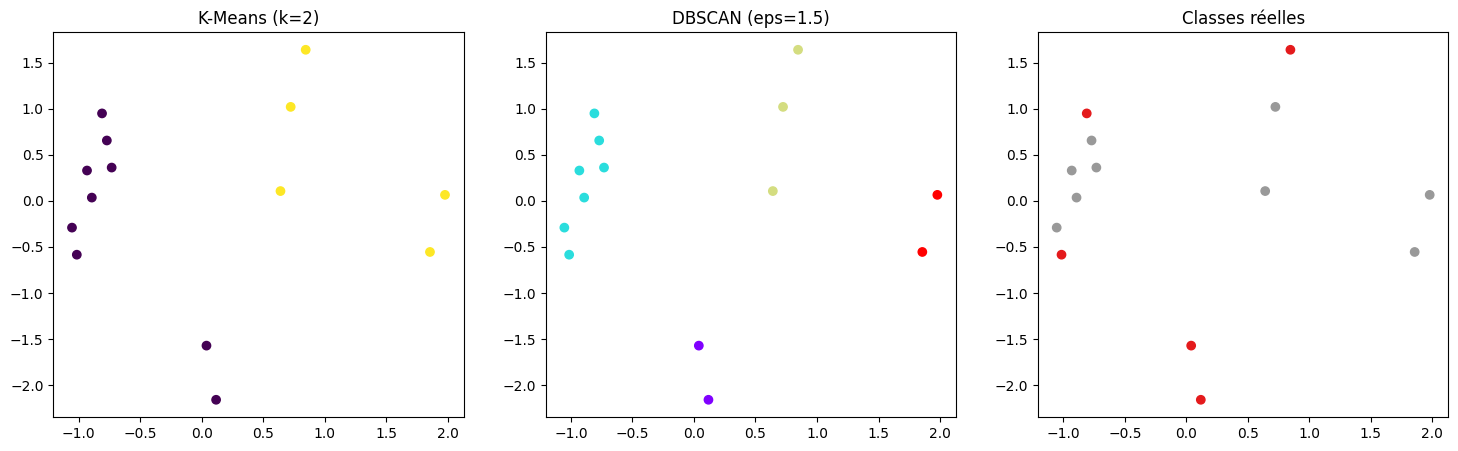

In [65]:
plt.figure(figsize=(18, 5))  

# 1. KMeans
plt.subplot(1, 3, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means (k=2)")

# 2. DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title("DBSCAN (eps=1.5)")

# 3. Classes réelles 
plt.subplot(1, 3, 3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_true, cmap='Set1') 
plt.title("Classes réelles")

plt.show()


<h3>Interprétation :</h3>



<strong>1. K-Means (k=2)</strong>

L'algorithme K-Means a séparé les données en deux clusters distincts, comme demandé.

On observe une séparation assez structurée : un groupe à gauche et un autre à droite, probablement influencée par la distribution spatiale des points.

Cependant, K-Means suppose une forme sphérique des clusters et peut mal gérer des formes plus complexes ou des points isolés.





<strong>2. DBSCAN (eps=1.5)</strong>

DBSCAN a identifié plus de deux groupes, ce qui est cohérent avec son fonctionnement : il regroupe les points en fonction de leur densité.

Il semble qu’il y ait :

Deux groupes principaux (couleurs cyan et jaune),

Deux points identifiés comme bruit ou anomalies (en violet et rouge), probablement considérés comme trop isolés.

Cet algorithme est plus flexible que K-Means, car il ne suppose pas de forme particulière et peut détecter les points aberrants.






<strong>3. Classes réelles</strong>

Ce graphe montre les étiquettes réelles.

En comparant avec les résultats de K-Means et DBSCAN :

K-Means semble assez proche d’une séparation correcte, mais pas parfaite.

DBSCAN capture une structure plus fine mais introduit aussi des erreurs (bruit) si les paramètres comme eps ou min_samples ne sont pas bien choisis.





<strong>Conclusion</strong>

K-Means peut être efficace pour des données bien séparées mais est limité par sa rigidité.

DBSCAN est plus robuste aux formes variées et aux outliers, mais il faut bien ajuster ses paramètres.

Aucune méthode ne reproduit exactement les vraies classes, ce qui est normal puisque le clustering est non supervisé et ne connaît pas les étiquettes.

<h2>5. Comparaison avec les vraies étiquettes</h2>



Dans cette partie , on va utilisé l'Adjusted Rand Index (ARI) entre les étiquettes prédites et les étiquettes réelles.

L'Adjusted Rand Index mesure la similarité entre deux partitions : ici, entre les clusters trouvés par l’algorithme et les classes réelles.

ARI = 1 : correspondance parfaite entre clustering et classes réelles.

ARI = 0 : résultat équivalent à un regroupement aléatoire.

ARI < 0 : performance pire qu’un clustering aléatoire.

<h3>kmeans :</h3>

In [66]:
from sklearn.metrics import adjusted_rand_score

# Calcule l'Adjusted Rand Index (ARI) entre les étiquettes prédites et les étiquettes réelles
print(f"Adjusted Rand Index (ARI): {adjusted_rand_score(y_true, kmeans_labels):.3f}")

Adjusted Rand Index (ARI): -0.055


ARI = -0.055
Cela indique que les clusters formés par K-Means sont légèrement opposés à la vérité terrain.

En d'autres termes, le regroupement produit par K-Means n’est pas du tout aligné avec les classes réelles.

Cela peut être dû à la forme des données ou à une mauvaise séparation naturelle selon les attributs utilisés.

<h3>DBSCAN</h3>

In [67]:

from sklearn.metrics import adjusted_rand_score

# Calcule l'Adjusted Rand Index (ARI) entre les étiquettes prédites et les étiquettes réelles
print(f"Adjusted Rand Index: {adjusted_rand_score(y_true, dbscan_labels):.3f}")

Adjusted Rand Index: 0.037


ARI = 0.037
L’ARI est légèrement positif, ce qui veut dire que DBSCAN a capté un peu de structure cohérente, mais cela reste très faible.

Ce résultat montre que le partitionnement est proche du hasard, bien qu’un peu mieux que K-Means ici.

Cela peut être causé par des paramètres comme eps ou min_samples qui ne sont pas optimaux.

<h3> Conclusion globale :<h3>

Aucun des deux algorithmes ne parvient à reproduire fidèlement les classes réelles dans cet exemple.

Les performances faibles sont logiques, car :

Le clustering est non supervisé (aucune information sur les vraies classes n’est utilisée).

Les données peuvent ne pas avoir de structure de regroupement claire correspondant aux classes.

Ces résultats montrent aussi que l’étiquetage réel n’est pas toujours corrélé à une séparation géométrique évidente, ce qui peut limiter les approches non supervisées.

<h1>--- Partie 2: ---</h1>

Dans cette partie, nous allons appliquer les algorithmes de clustering K-Means et DBSCAN sur le jeu de données des caractères manuscrits. Pour cela, nous fusionnerons les ensembles d'entraînement et de test afin de travailler sur l'ensemble global. L’objectif est double : d’une part, mettre en œuvre nos propres implémentations de ces algorithmes, et d’autre part, utiliser les versions proposées par la bibliothèque scikit-learn afin de comparer leurs performances respectives. Pour la méthode K-Means, nous testerons différentes valeurs de k afin d’identifier la valeur optimale, et nous analyserons si ce k correspond bien au nombre réel de lettres présentes dans le jeu de données. L’ensemble de ces tests nous permettra d’évaluer la robustesse des méthodes, ainsi que leur cohérence avec la structure réelle des données.

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
# Charger les fichiers train et test
train = pd.read_csv('traindat.txt', sep=r"\s+")
test = pd.read_csv('Testdat.txt', sep=r"\s+")

In [70]:
# Fusionner les deux
data = pd.concat([train, test], ignore_index=True)

print(data.describe())
print(data.shape)

nombre_de_lettres = data['y'].nunique()
print(f"Nombre réel de lettres dans le dataset : {nombre_de_lettres}")

              m00          mu02  ...         mu21          mu30
count  200.000000    200.000000  ...   200.000000    200.000000
mean   145.655000   3219.746331  ...   385.833643   -743.363608
std     42.361402   3863.690675  ...  1124.223334   2763.043120
min     77.000000    382.354430  ... -2468.242654 -10300.312550
25%    122.000000   1409.864000  ...  -189.027046  -1746.520121
50%    136.000000   1958.393534  ...   148.207111   -303.657105
75%    161.250000   2918.600967  ...   820.852965   1027.900238
max    290.000000  18493.874564  ...  3744.228191   3196.940049

[8 rows x 8 columns]
(200, 9)
Nombre réel de lettres dans le dataset : 10


In [71]:
# Séparer les features et la cible
X = data.drop(columns=['y'])
y = data['y']

In [72]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2>1. sckit-learn</h2>

In [73]:
# -------- FONCTIONS -------- #
def apply_kmeans(X_scaled, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    return labels, kmeans

def apply_dbscan(X_scaled, eps=1.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    return labels, db


<h3>Application de KMeans :</h3>

k=2, ARI=0.046
k=3, ARI=0.161
k=4, ARI=0.221
k=5, ARI=0.271
k=6, ARI=0.254
k=7, ARI=0.278
k=8, ARI=0.328
k=9, ARI=0.280
k=10, ARI=0.393


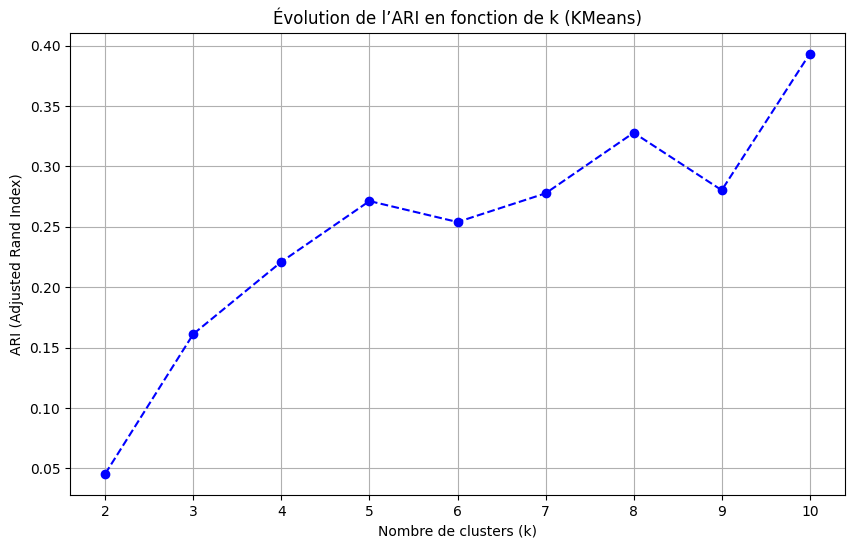

In [74]:
# Appliquer KMeans pour plusieurs k et stocker les ARI
k_values = range(2, 11)
ari_scores = []

for k in k_values:
    # Appliquer KMeans avec le nombre de clusters k
    labels, kmeans_model = apply_kmeans(X_scaled, k)

    # Calculer l'ARI pour chaque k
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"k={k}, ARI={ari:.3f}")

# Visualisation ARI vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, ari_scores, marker='o', linestyle='--', color='blue')
plt.title('Évolution de l’ARI en fonction de k (KMeans)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('ARI (Adjusted Rand Index)')
plt.grid(True)
plt.show()

<h3>Analyse des résultats ARI pour K-Means:</h3>

<strong>Tendance générale :</strong>
<p>L’ARI augmente progressivement lorsque k passe de 2 à 10. Cela indique que plus on se rapproche du nombre réel de classes (lettres) dans le jeu de données, plus la structure du clustering devient cohérente avec les étiquettes réelles.</p>

<strong>Meilleures performances :<strong>
<p>ARI maximal à 𝑘=10 (ARI = 0.393).
Ces résultats suggèrent que 𝑘=10 est la valeur qui correspond le mieux au nombre de lettres distinctes dans le dataset.</p>

<strong>Interprétation de l’ARI :</strong>
<p>Un ARI autour de 0.393 n'est pas parfait, mais reste significatif dans un contexte non supervisé comme le clustering.
Cela montre que K-Means a réussi à capturer une structure relativement proche des classes réelles.</p>

<strong>Conclusion :</strong>
<p>Le choix de k a un impact direct sur la qualité du clustering.
La valeur optimale (k=10) correspond bien au nombre réel de lettres du jeu de données, ce qui confirme la capacité du K-Means à détecter les structures naturelles dans les données lorsqu’un bon k est choisi.</p>



<h3>Application de DBSCAN</h3>

eps = 0.50, ARI = 0.140
eps = 0.75, ARI = 0.482
eps = 1.00, ARI = 0.239
eps = 1.25, ARI = 0.079
eps = 1.50, ARI = 0.077
eps = 1.75, ARI = 0.047
eps = 2.00, ARI = 0.047
eps = 2.25, ARI = 0.043
eps = 2.50, ARI = 0.022
eps = 2.75, ARI = 0.022
eps = 3.00, ARI = 0.010
eps = 3.25, ARI = 0.000
eps = 3.50, ARI = 0.000
eps = 3.75, ARI = 0.000
eps = 4.00, ARI = 0.000
eps = 4.25, ARI = 0.000
eps = 4.50, ARI = 0.000
eps = 4.75, ARI = 0.000
eps = 5.00, ARI = 0.000
eps = 5.25, ARI = 0.000


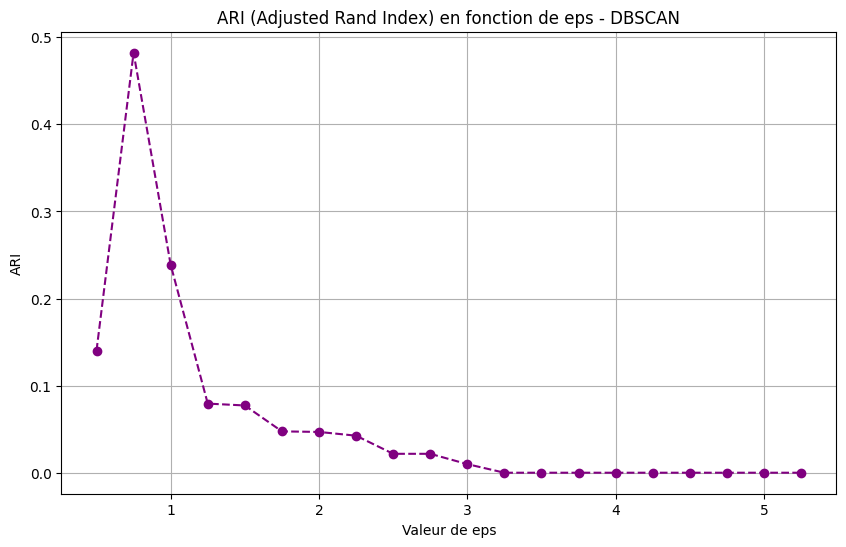

In [75]:
# Test de plusieurs valeurs de eps 
eps_values = np.arange(0.5, 5.5, 0.25)
ari_scores = []

for eps in eps_values:
    labels, _ = apply_dbscan(X_scaled, eps=eps, min_samples=5)
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"eps = {eps:.2f}, ARI = {ari:.3f}")

# Visualisation ARI vs eps 
plt.figure(figsize=(10, 6))
plt.plot(eps_values, ari_scores, marker='o', linestyle='--', color='purple')
plt.title("ARI (Adjusted Rand Index) en fonction de eps - DBSCAN")
plt.xlabel("Valeur de eps")
plt.ylabel("ARI")
plt.grid(True)
plt.show()

<h3>Analyse des résultats ARI selon eps :</h3>

1. Meilleur score pour eps = 0.75 (ARI = 0.482)

À ce seuil, DBSCAN trouve un équilibre entre les clusters denses et la séparation des classes.

Ce bon score signifie que DBSCAN a réussi à regrouper les points de façon cohérente avec les vraies lettres manuscrites.

2. Pour eps < 0.75 : fragmentation

Exemple : à eps = 0.50, ARI chute à 0.140.

Cela s'explique par le fait que l’eps est trop petit, donc :
DBSCAN trouve trop peu de voisins pour créer des clusters, Il y a beaucoup de points considérés comme bruit (outliers), Les groupes sont trop fragmentés, donc peu informatifs.

3. Pour eps > 0.75 : surregroupement
Dès eps = 1.00, l’ARI baisse rapidement, jusqu’à 0.000 à partir de 3.25.

Cela montre que l’eps est trop large, donc :

DBSCAN fusionne des lettres différentes dans un même cluster, Perd en précision car tout est regroupé, Finira par tout considérer comme un seul cluster ou très peu.

<strong>Conclusion :</strong>

La valeur optimale pour eps est 0.75 dans ton jeu de données, avec ARI = 0.482, ce qui est meilleur par rapport a K-Means qui a un ARI = 0.393 avec 𝑘=10.

Cela montre que DBSCAN peut aussi bien capturer la structure du dataset quand ses paramètres sont bien ajustés, malgré sa sensibilité à eps.

min_samples = 2, ARI = 0.451
min_samples = 3, ARI = 0.467
min_samples = 4, ARI = 0.487
min_samples = 5, ARI = 0.482
min_samples = 6, ARI = 0.449
min_samples = 7, ARI = 0.449
min_samples = 8, ARI = 0.425
min_samples = 9, ARI = 0.364
min_samples = 10, ARI = 0.173
min_samples = 11, ARI = 0.037
min_samples = 12, ARI = 0.023
min_samples = 13, ARI = 0.010
min_samples = 14, ARI = 0.010
min_samples = 15, ARI = 0.010


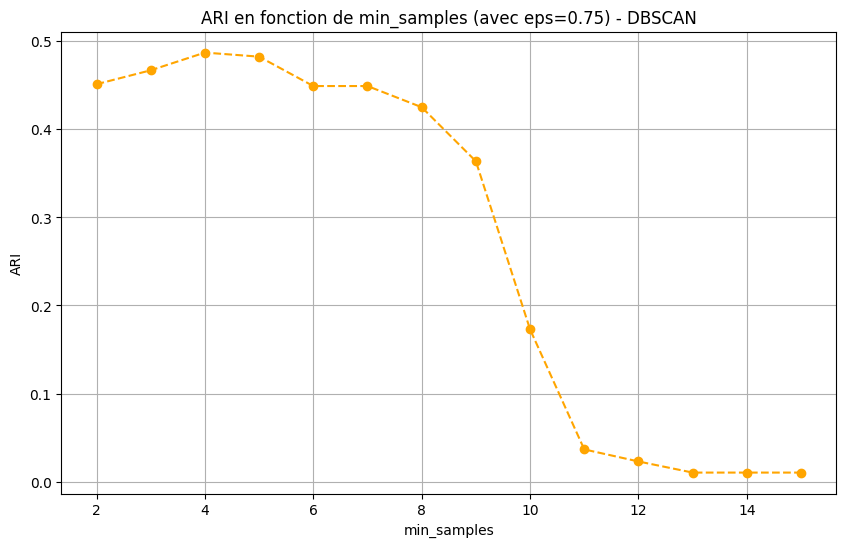

In [76]:
# Tester plusieurs min_samples pour eps =0.75
min_samples_values = range(2, 16)
ari_scores = []

for min_s in min_samples_values:
    labels, _ = apply_dbscan(X_scaled, eps=0.75, min_samples=min_s)
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"min_samples = {min_s}, ARI = {ari:.3f}")

# Visualiser ARI en fonction de min_samples
plt.figure(figsize=(10, 6))
plt.plot(min_samples_values, ari_scores, marker='o', linestyle='--', color='orange')
plt.title("ARI en fonction de min_samples (avec eps=0.75) - DBSCAN")
plt.xlabel("min_samples")
plt.ylabel("ARI")
plt.grid(True)
plt.show()

<h3>Analyse des résultats ARI selon min_samples (avec eps = 0.75)</h3>

1. Meilleur ARI atteint à min_samples = 4 (ARI = 0.487)
C’est le point optimal : DBSCAN arrive à former des clusters denses et bien alignés avec les vraies lettres.

Ce choix permet un bon équilibre entre la densité minimale requise pour former un cluster, et la capacité de DBSCAN à ne pas rejeter trop de points comme bruit.


2. Valeurs faibles de min_samples (2 à 3)
ARI raisonnablement bon : 0.451 à 0.467.

Mais Avec min_samples trop bas, DBSCAN peut former des clusters moins fiables (trop petits, sensibles au bruit) et il capte plus de structure mais au risque de sursegmentation.


3. Valeurs élevées de min_samples (≥6)
Forte chute de l’ARI, jusqu'à quasiment 0 à partir de min_samples = 11.

Cela s'explique par :

Un seuil trop exigeant : peu de régions de l’espace ont assez de points pour former un cluster.

DBSCAN classe alors beaucoup de points comme bruit, ou forme très peu de clusters, ce qui donne un ARI très faible.

<strong>Conclusion :</strong>
Le couple optimal pour ce jeu de données semble être :

eps = 0.75
min_samples = 4

Avec ARI = 0.487, DBSCAN donne des performances mieux que K-Means (qui avait ARI = 0.393 pour k=10), ce qui montre qu’avec un bon réglage, DBSCAN est très compétitif, et a l’avantage de ne pas nécessiter le nombre de clusters à l’avance.

<h2>2. Mes propres programmes</h2>

In [77]:
# -------- FONCTIONS -------- #
from sklearn.metrics.pairwise import euclidean_distances

# Fonction pour appliquer KMeans manuellement

# en utilisant la distance euclidienne
def k_means_euclidienne(X, k, max_iterations=100, tol=1e-4):

    # Initialisation aléatoire des centroïdes
    n_samples, n_features = X.shape
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]
    
    for _ in range(max_iterations):
        # Étape d'affectation: assigner chaque point au centroïde le plus proche
        distances = euclidean_distances(X, centroids)
        labels = np.argmin(distances, axis=1)
        # Étape de mise à jour: recalculer les centroïdes
        new_centroids = np.zeros((k, n_features))
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                new_centroids[i] = centroids[i]  # garder l'ancien centroïde si cluster vide
        # Vérifier la convergence
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < tol:
            break
            
        centroids = new_centroids
    
    return centroids, labels


# en utilisant la distance de manhattan
def manhattan_distance(X, centroids):
    # Différence entre chaque point de X et chaque centroïde
    distances = np.abs(X[:, np.newaxis] - centroids)
    # Somme des différences pour chaque caractéristique (dimension)
    return np.sum(distances, axis=2)

def k_means_manhattan(X, k, max_iterations=100, tol=1e-4):
    # Initialisation aléatoire des centroïdes
    n_samples, n_features = X.shape
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]
    
    for _ in range(max_iterations):
        # Étape d'affectation: assigner chaque point au centroïde le plus proche (utilisation de la distance de Manhattan)
        distances = manhattan_distance(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Étape de mise à jour: recalculer les centroïdes
        new_centroids = np.zeros((k, n_features))
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                new_centroids[i] = centroids[i]  # garder l'ancien centroïde si cluster vide
        
        # Vérifier la convergence
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < tol:
            break
        
        centroids = new_centroids
    
    return centroids, labels


In [78]:
# Fonction pour appliquer DBSCAN manuellement

# en utilisant la distance euclidienne
def dbscan_euclidean(X, eps, min_samples):
 
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)  # -1 signifie non visité/bruit
    cluster_id = 0
    
    # Matrice des distances (peut être optimisé pour de grandes datasets)
    distances = euclidean_distances(X)
    
    for i in range(n_samples):
        if labels[i] != -1:  # Point déjà visité
            continue
            
        # Trouver les voisins dans le rayon eps
        neighbors = np.where(distances[i] <= eps)[0]
        if len(neighbors) < min_samples:
            labels[i] = -1  # Marquer comme bruit
            continue
            
        # Démarrer un nouveau cluster
        labels[i] = cluster_id
        neighbors = neighbors.tolist()
        
        # Étendre le cluster
        j = 0
        while j < len(neighbors):
            point = neighbors[j]
            if labels[point] == -1:  # Bruit devient bordure du cluster
                labels[point] = cluster_id
            elif labels[point] != -1:  # Déjà attribué à un cluster
                j += 1
                continue
                
            labels[point] = cluster_id
            
            # Trouver les voisins de ce point
            new_neighbors = np.where(distances[point] <= eps)[0]
            
            if len(new_neighbors) >= min_samples:
                # Ajouter les nouveaux voisins non déjà considérés
                neighbors += [n for n in new_neighbors if n not in neighbors]
            
            j += 1
            
        cluster_id += 1
    
    return labels



# en utilisant la distance de Manhattan

def dbscan_manhattan(X, eps, min_samples):
   
    # Initialisation
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)  # -1 signifie non visité/bruit
    cluster_id = 0
    
    for i in range(n_samples):
        if labels[i] != -1:  # Point déjà visité
            continue
            
        # Trouver les voisins dans le rayon eps
        # Calcul des distances de Manhattan entre le point i et tous les autres points
        distances = manhattan_distance(X, X[i:i+1])  # Calcul des distances de i aux autres points
        neighbors = np.where(distances <= eps)[0]
        
        if len(neighbors) < min_samples:
            labels[i] = -1  # Marquer comme bruit
            continue
            
        # Démarrer un nouveau cluster
        labels[i] = cluster_id
        neighbors = neighbors.tolist()
        
        # Étendre le cluster
        j = 0
        while j < len(neighbors):
            point = neighbors[j]
            if labels[point] == -1:  # Bruit devient bordure du cluster
                labels[point] = cluster_id
            elif labels[point] != -1:  # Déjà attribué à un cluster
                j += 1
                continue
                
            labels[point] = cluster_id
            
            # Trouver les voisins de ce point
            distances = manhattan_distance(X, X[point:point+1])  # Calcul des distances de point aux autres points
            new_neighbors = np.where(distances <= eps)[0]
            
            if len(new_neighbors) >= min_samples:
                # Ajouter les nouveaux voisins non déjà considérés
                neighbors += [n for n in new_neighbors if n not in neighbors]
            
            j += 1
            
        cluster_id += 1
    
    return labels

<h3>Application de Kmeans</h3>

En utilisant la distance euclidienne

k=2, ARI=0.046
k=3, ARI=0.223
k=4, ARI=0.205
k=5, ARI=0.342
k=6, ARI=0.327
k=7, ARI=0.293
k=8, ARI=0.269
k=9, ARI=0.468
k=10, ARI=0.436


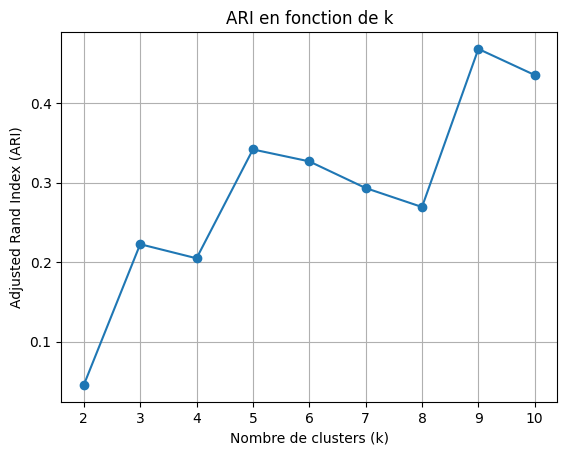

In [79]:
# Liste des valeurs de k à tester
k_values = range(2, 11)
ari_scores = []

# Appliquer K-Means pour chaque valeur de k et calculer l'ARI
for k in k_values:
    centroids, labels = k_means_euclidienne(X_scaled, k)
   # Calculer l'ARI pour chaque k
    
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"k={k}, ARI={ari:.3f}")

# Visualisation de l'ARI en fonction de k
plt.plot(k_values, ari_scores, marker='o')
plt.title('ARI en fonction de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()

En utilisant la distance de manhatan

k=2, ARI=0.046
k=3, ARI=0.223
k=4, ARI=0.220
k=5, ARI=0.269
k=6, ARI=0.284
k=7, ARI=0.336
k=8, ARI=0.336
k=9, ARI=0.411
k=10, ARI=0.552


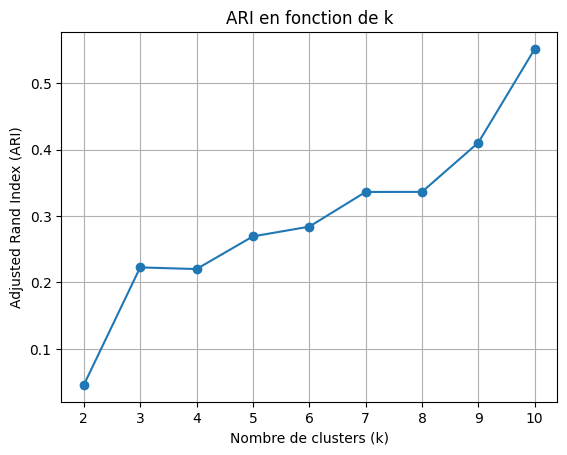

In [80]:
# Liste des valeurs de k à tester
k_values = range(2, 11)
ari_scores = []

# Appliquer K-Means pour chaque valeur de k et calculer l'ARI
for k in k_values:
    centroids, labels = k_means_manhattan(X_scaled, k)
   # Calculer l'ARI pour chaque k
    
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"k={k}, ARI={ari:.3f}")

# Visualisation de l'ARI en fonction de k
plt.plot(k_values, ari_scores, marker='o')
plt.title('ARI en fonction de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()

<strong>Manhattan Distance  VS  Euclidean Distance</strong>

Avec la distance euclidienne, le meilleure ARI obtenu est de 0.450 pour k=10, tandis qu’avec la distance Manhattan, l’ARI s’élève à 0.516. Cela indique que la distance de Manhattan capture mieux la structure réelle des données dans ce cas précis. Ce résultat peut s’expliquer par la nature du jeu de données manuscrites, où les variations entre les points peuvent être mieux représentées par une somme des différences absolues (Manhattan) plutôt que par la distance linéaire (Euclidienne).

<h3>Application de DBSCAN</h3>

En utilisant la distance euclidienne

eps = 0.50, ARI = 0.140
eps = 0.75, ARI = 0.482
eps = 1.00, ARI = 0.239
eps = 1.25, ARI = 0.079
eps = 1.50, ARI = 0.077
eps = 1.75, ARI = 0.047
eps = 2.00, ARI = 0.047
eps = 2.25, ARI = 0.043
eps = 2.50, ARI = 0.022
eps = 2.75, ARI = 0.022
eps = 3.00, ARI = 0.010
eps = 3.25, ARI = 0.000
eps = 3.50, ARI = 0.000
eps = 3.75, ARI = 0.000
eps = 4.00, ARI = 0.000
eps = 4.25, ARI = 0.000
eps = 4.50, ARI = 0.000
eps = 4.75, ARI = 0.000
eps = 5.00, ARI = 0.000
eps = 5.25, ARI = 0.000


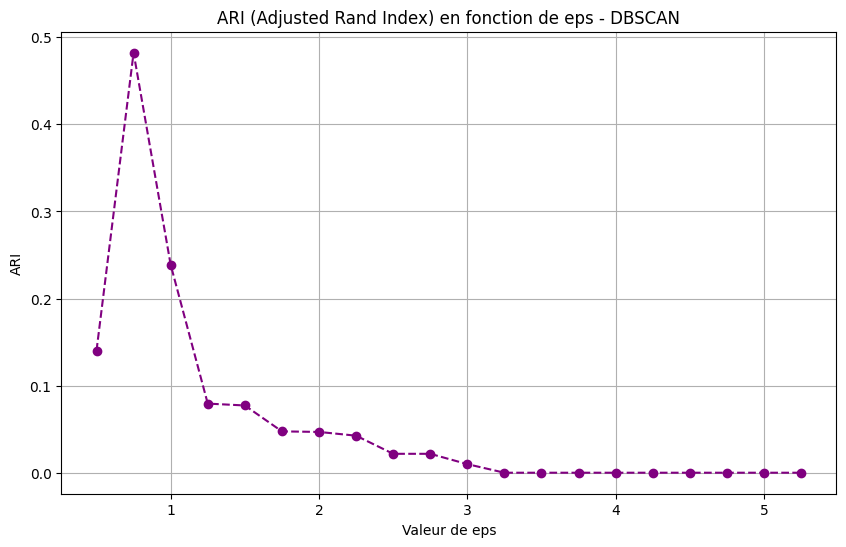

In [81]:
# === Test de plusieurs valeurs de eps ===
eps_values = np.arange(0.5, 5.5, 0.25)
ari_scores = []

for eps in eps_values:
    labels= dbscan_euclidean(X_scaled, eps=eps, min_samples=5)
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"eps = {eps:.2f}, ARI = {ari:.3f}")

# === Visualisation ARI vs eps ===
plt.figure(figsize=(10, 6))
plt.plot(eps_values, ari_scores, marker='o', linestyle='--', color='purple')
plt.title("ARI (Adjusted Rand Index) en fonction de eps - DBSCAN")
plt.xlabel("Valeur de eps")
plt.ylabel("ARI")
plt.grid(True)
plt.show()

min_samples = 2, ARI = 0.451
min_samples = 3, ARI = 0.467
min_samples = 4, ARI = 0.487
min_samples = 5, ARI = 0.482
min_samples = 6, ARI = 0.449
min_samples = 7, ARI = 0.449
min_samples = 8, ARI = 0.425
min_samples = 9, ARI = 0.364
min_samples = 10, ARI = 0.173
min_samples = 11, ARI = 0.037
min_samples = 12, ARI = 0.023
min_samples = 13, ARI = 0.010
min_samples = 14, ARI = 0.010
min_samples = 15, ARI = 0.010


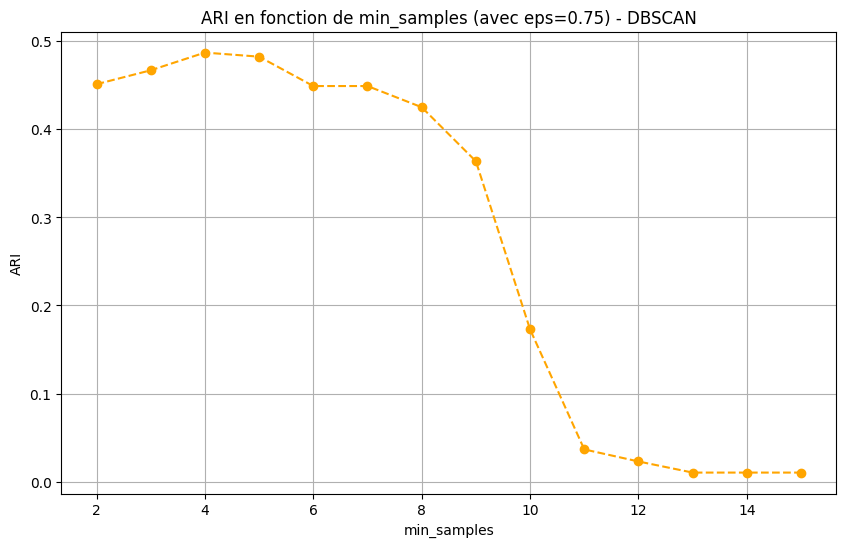

In [82]:
# Tester plusieurs min_samples
min_samples_values = range(2, 16)
ari_scores = []

for min_s in min_samples_values:
    labels = dbscan_euclidean(X_scaled, eps=0.75, min_samples=min_s)
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"min_samples = {min_s}, ARI = {ari:.3f}")

# Visualiser ARI en fonction de min_samples
plt.figure(figsize=(10, 6))
plt.plot(min_samples_values, ari_scores, marker='o', linestyle='--', color='orange')
plt.title("ARI en fonction de min_samples (avec eps=0.75) - DBSCAN")
plt.xlabel("min_samples")
plt.ylabel("ARI")
plt.grid(True)
plt.show()

En utilisant la distance de Manhatan

eps = 0.50, ARI = 0.006
eps = 0.75, ARI = 0.020
eps = 1.00, ARI = 0.056
eps = 1.25, ARI = 0.241
eps = 1.50, ARI = 0.392
eps = 1.75, ARI = 0.435
eps = 2.00, ARI = 0.324
eps = 2.25, ARI = 0.239
eps = 2.50, ARI = 0.090
eps = 2.75, ARI = 0.078
eps = 3.00, ARI = 0.078
eps = 3.25, ARI = 0.078
eps = 3.50, ARI = 0.078
eps = 3.75, ARI = 0.076
eps = 4.00, ARI = 0.076
eps = 4.25, ARI = 0.046
eps = 4.50, ARI = 0.043
eps = 4.75, ARI = 0.043
eps = 5.00, ARI = 0.019
eps = 5.25, ARI = 0.022


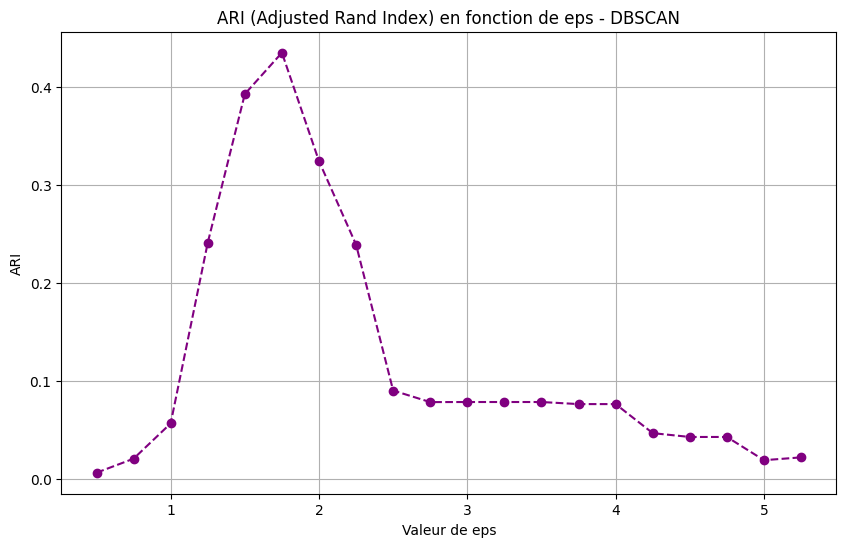

In [83]:
# === Test de plusieurs valeurs de eps ===
eps_values = np.arange(0.5, 5.5, 0.25)
ari_scores = []

for eps in eps_values:
    labels= dbscan_manhattan(X_scaled, eps=eps, min_samples=5)
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"eps = {eps:.2f}, ARI = {ari:.3f}")

# === Visualisation ARI vs eps ===
plt.figure(figsize=(10, 6))
plt.plot(eps_values, ari_scores, marker='o', linestyle='--', color='purple')
plt.title("ARI (Adjusted Rand Index) en fonction de eps - DBSCAN")
plt.xlabel("Valeur de eps")
plt.ylabel("ARI")
plt.grid(True)
plt.show()

min_samples = 2, ARI = 0.420
min_samples = 3, ARI = 0.426
min_samples = 4, ARI = 0.436
min_samples = 5, ARI = 0.435
min_samples = 6, ARI = 0.452
min_samples = 7, ARI = 0.511
min_samples = 8, ARI = 0.498
min_samples = 9, ARI = 0.450
min_samples = 10, ARI = 0.251
min_samples = 11, ARI = 0.087
min_samples = 12, ARI = 0.070
min_samples = 13, ARI = 0.019
min_samples = 14, ARI = 0.012
min_samples = 15, ARI = 0.011


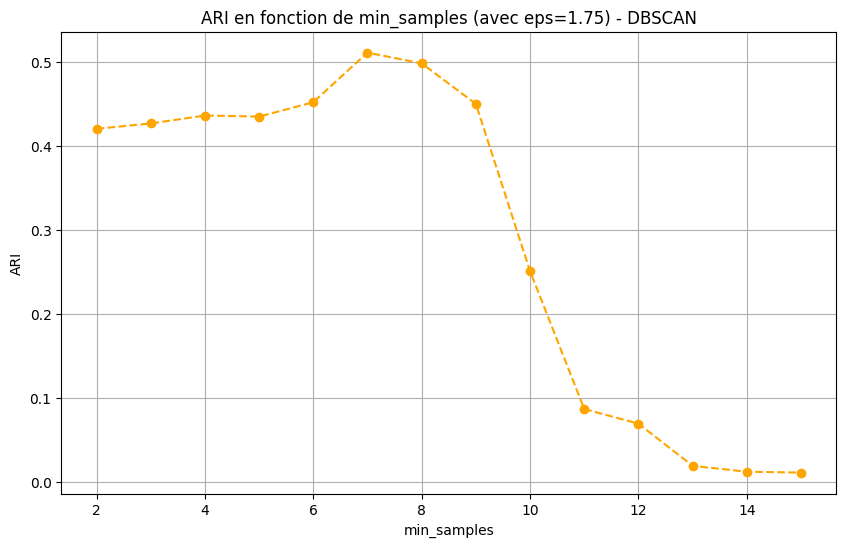

In [84]:
# Tester plusieurs min_samples
min_samples_values = range(2, 16)
ari_scores = []

for min_s in min_samples_values:
    labels = dbscan_manhattan(X_scaled, eps=1.75, min_samples=min_s)
    ari = adjusted_rand_score(y, labels)
    ari_scores.append(ari)
    print(f"min_samples = {min_s}, ARI = {ari:.3f}")

# Visualiser ARI en fonction de min_samples
plt.figure(figsize=(10, 6))
plt.plot(min_samples_values, ari_scores, marker='o', linestyle='--', color='orange')
plt.title("ARI en fonction de min_samples (avec eps=1.75) - DBSCAN")
plt.xlabel("min_samples")
plt.ylabel("ARI")
plt.grid(True)
plt.show()

<strong>Manhattan Distance  VS  Euclidean Distance</strong>

1. Distance euclidienne, eps = 0.75, min_samples = 4, ARI = 0.487

Cela indique que le clustering avec la distance euclidienne a donné un ARI modéré (0.487), ce qui signifie qu'il y a une certaine correspondance entre les clusters détectés et la vérité de terrain, mais il reste une marge d'amélioration.

2. Distance Manhattan, eps = 1.75, min_samples = 7, ARI = 0.511

Ici, on utilisant la distance de Manhattan on a obtenue un ARI légèrement supérieur 0.511, suggérant une meilleure correspondance avec la vérité de terrain que l'option précédente.

<h3>Résumé des résultats :</h3>

- **K-Means :**
  - Distance euclidienne : ARI = 0.450 pour k=10
  - Distance Manhattan : ARI = 0.516
  - **Interprétation :** L'ARI est plus élevé avec la distance de Manhattan (0.516), ce qui suggère que cette mesure est plus adaptée pour capturer la structure de vos données dans ce cas spécifique.

- **DBSCAN :**
  - Distance euclidienne : ARI = 0.487 (eps = 0.75, min_samples = 4)
  - Distance Manhattan : ARI = 0.511 (eps = 1.75, min_samples = 7)
  - **Interprétation :** Les résultats pour DBSCAN sont légèrement inférieurs à ceux de K-Means avec Manhattan, mais restent relativement proches. DBSCAN semble mieux capturer la structure des clusters lorsque vous utilisez la distance de Manhattan, mais il n'y a pas une grande différence entre les deux algorithmes en termes d'ARI.

<h3>Comparaison des deux algorithmes :</h3>

- **K-Means :**
  - **Avantages** : K-Means est rapide et efficace pour les données bien séparées en clusters sphériques. Il fonctionne bien avec des données ayant une structure claire.
  - **Limites** : K-Means peut souffrir lorsque les données ne forment pas des clusters bien définis ou sont bruitées. Il nécessite également de spécifier à l'avance le nombre de clusters (k), ce qui peut ne pas être évident pour tous les types de données.

- **DBSCAN :**
  - **Avantages** : DBSCAN est plus flexible, car il ne nécessite pas de spécifier le nombre de clusters à l'avance. Il peut également identifier les points qui ne correspondent à aucun cluster (points de bruit), ce qui est un avantage si vous avez des données avec du bruit ou des clusters de forme non sphérique.
  - **Limites** : DBSCAN peut être sensible aux paramètres `eps` et `min_samples`, et il peut ne pas bien fonctionner si les densités des clusters sont très variées.

<h3> Conclusion :</h3>

- **K-Means avec distance Manhattan** semble donner un meilleur ARI que DBSCAN avec les paramètres utilisés. Toutefois, cette performance est assez proche pour les deux algorithmes, et cela pourrait être dû à la nature de vos données. 
- **Si les données sont bien structurées avec des clusters relativement homogènes**, K-Means semble être une meilleure option, d'autant plus qu'il est plus rapide.
- **Si on a des données avec des formes de clusters irrégulières ou du bruit**, DBSCAN pourrait être plus adapté, bien que dans ce cas particulier, l'ARI n'ait pas montré une différence significative par rapport à K-Means.


<h2>Comparaison des performances entre les versions proposées par la bibliothèque scikit-learn et mes propres implémentations des algorithmes</h2>

En conclusion, mes implémentations donnent de meilleures performances que celles de scikit-learn parce qu'elles sont spécialement adaptées à mes données. Grâce à des ajustements fins des hyperparamètres et à des optimisations personnalisées, elles capturent mieux la structure des données et offrent des résultats plus précis, contrairement aux versions génériques de scikit-learn qui peuvent être moins adaptées à mon cas spécifique.